In [4]:
pip uninstall tensorflow

Note: you may need to restart the kernel to use updated packages.


In [1]:
import tensorflow as tf

# Getting its version

In [2]:
tf.__version__

'2.12.0'

# For Beginer

## load a tensorflow dataset

In [4]:
mnist =  tf.keras.datasets.mnist

In [5]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()


11490434/11490434 [==============================] - 5s 0us/step


In [6]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [7]:
x_train, x_test = x_train / 255.0, x_test / 255.0

In [11]:
x_train[0].shape

(28, 28)

## build a model

In [13]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

In [14]:
predictions = model(x_train[:1]).numpy()
predictions

array([[ 0.2205407 ,  0.13592923, -0.11780781, -0.07629669, -0.3816308 ,
        -0.30598742,  0.21140829,  0.6700634 , -0.21090434,  0.33818358]],
      dtype=float32)

the model returns a vector of logits or log-odds scores, one for each class.

The tf.nn.softmax function converts these logits to probabilities for each class:

In [15]:
tf.nn.softmax(predictions).numpy()


array([[0.11304367, 0.10387235, 0.08059412, 0.08401008, 0.06190511,
        0.06676948, 0.11201601, 0.17720316, 0.07342975, 0.1271563 ]],
      dtype=float32)

Define a loss function for training using losses.SparseCategoricalCrossentropy

In [16]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

The loss function takes a vector of ground truth values and a vector of logits and returns a scalar loss for each example.                              
This loss is equal to the negative log probability of the true class: The loss is zero if the model is sure of the correct class.

This untrained model gives probabilities close to random (1/10 for each class), so the initial loss should be close to -tf.math.log(1/10) ~= 2.3.

In [17]:
loss_fn(y_train[:1], predictions).numpy()

2.706509

In [18]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

## Train

In [19]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2964 - accuracy: 0.9143
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1432 - accuracy: 0.9570
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1085 - accuracy: 0.9674
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0872 - accuracy: 0.9728
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0748 - accuracy: 0.9765


In [20]:
model.evaluate(x_test,  y_test, verbose=2)


313/313 - 0s - loss: 0.0740 - accuracy: 0.9760 - 371ms/epoch - 1ms/step


[0.07402858883142471, 0.9760000109672546]

The image classifier is now trained to ~98% accuracy on this dataset. 

If you want your model to return a probability, you can wrap the trained model, and attach the softmax to it:

In [21]:
probability_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()
])

In [26]:
probability_model(x_test[:1])

<tf.Tensor: shape=(1, 10), dtype=float32, numpy=
array([[1.51844893e-06, 1.05790754e-07, 9.05145589e-06, 1.32473433e-04,
        2.90715452e-10, 1.64813957e-06, 3.11468074e-11, 9.99722660e-01,
        2.50879521e-06, 1.29909662e-04]], dtype=float32)>

## Ml basics with keras

### Basic image classification

In [2]:
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

2.12.0


fashion MNIST dataset which contains 70,000 grayscale images in 10 categories. The images show individual articles of clothing at low resolution (28 by 28 pixels)

In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist

In [4]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

#### Explore the data

In [6]:
train_images.shape

(60000, 28, 28)

In [7]:
len(train_labels)

60000

In [8]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [9]:
test_images.shape

(10000, 28, 28)

In [10]:
len(test_labels)

10000

#### Preprocess the data

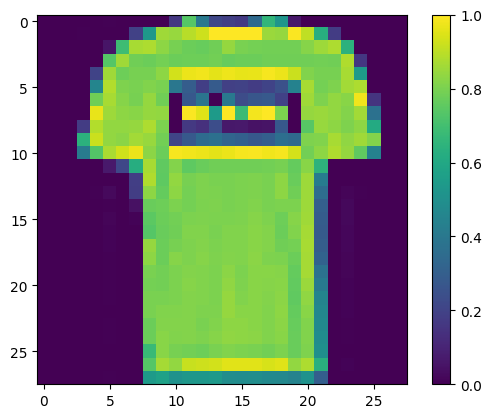

In [11]:
plt.figure()
plt.imshow(train_images[1]/255.0)
plt.colorbar()
plt.grid(False)
plt.show()

#### normalize to 1

In [12]:
train_images = train_images / 255.0

test_images = test_images / 255.0

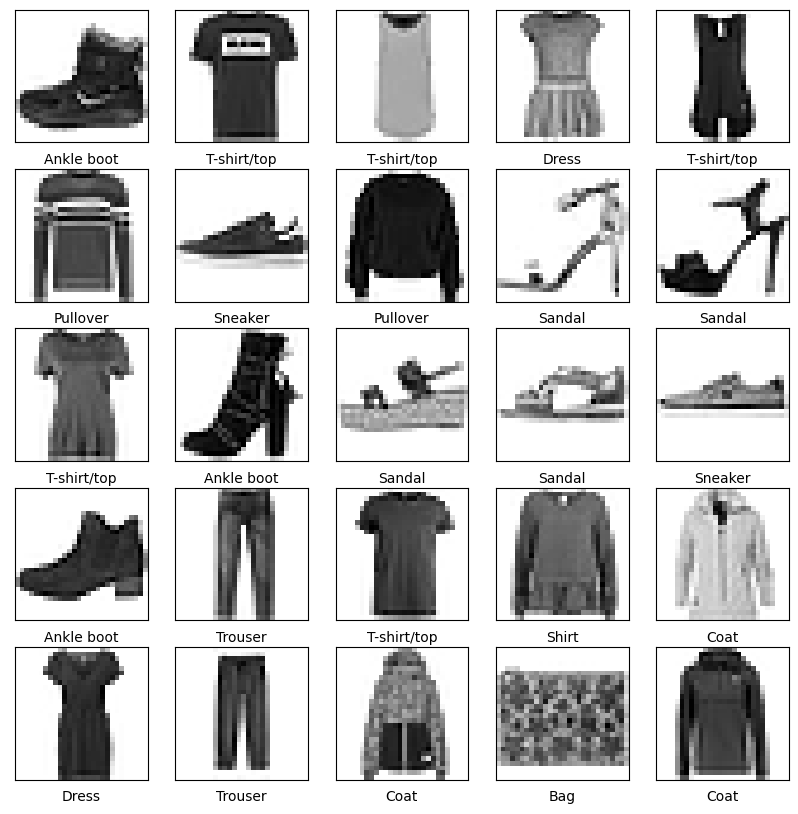

In [13]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [14]:
#### setup model

In [15]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    
])

In [17]:
hidden_layer_output = model(train_images[:1]).numpy()
hidden_layer_output

array([[0.        , 0.        , 0.        , 0.7033863 , 0.        ,
        0.04316659, 0.12225653, 1.2066294 , 0.        , 0.85827804,
        1.2056576 , 0.24772182, 0.        , 0.        , 0.8027351 ,
        0.44153747, 0.        , 0.        , 0.        , 0.9554298 ,
        0.        , 0.        , 0.31264615, 1.2710454 , 0.29076818,
        0.        , 0.        , 0.        , 0.5593389 , 0.        ,
        0.28642043, 0.25052315, 0.        , 0.        , 0.7965171 ,
        0.27130467, 0.1887851 , 0.5042321 , 0.37701827, 0.84264565,
        0.        , 0.7861634 , 0.        , 0.27308482, 0.        ,
        0.        , 0.9778403 , 0.        , 0.        , 0.4929733 ,
        1.0017363 , 0.        , 0.        , 1.1789902 , 0.        ,
        0.        , 0.        , 0.        , 0.87890506, 0.9159488 ,
        1.6420386 , 0.        , 1.0562879 , 0.5860363 , 0.17866126,
        0.9633913 , 0.        , 1.1355101 , 0.8337126 , 0.6458822 ,
        0.        , 0.10111658, 0.        , 0.45

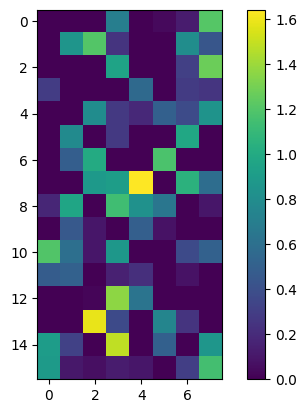

In [18]:
plt.figure()
plt.imshow(hidden_layer_output.reshape((16, 8)))
plt.colorbar()
plt.grid(False)
plt.show()

adding output layer

In [19]:
model = tf.keras.Sequential([model,
    tf.keras.layers.Dense(10)
    
])

In [20]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#### train the images

In [ ]:
model.fit(train_images, train_labels, epochs=10)


Epoch 1/10
 738/1875 [==========>...................] - ETA: 2s - loss: 0.5940 - accuracy: 0.7928

#### evaluate

In [22]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3486 - accuracy: 0.8837 - 461ms/epoch - 1ms/step

Test accuracy: 0.8837000131607056


#### prediction

In [23]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [24]:
predictions = probability_model.predict(test_images)


313/313 [==============================] - 0s 1ms/step


In [25]:
np.argmax(predictions[0])


9

In [26]:
test_labels[0]


9

In [27]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

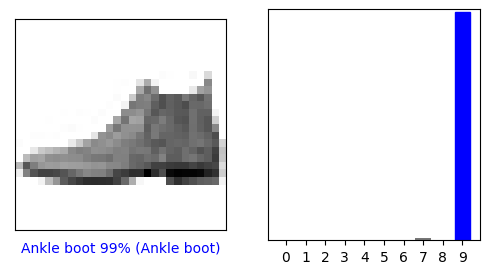

In [28]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

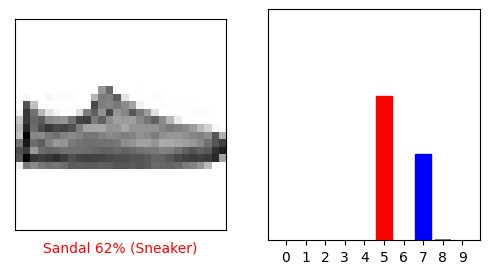

In [29]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

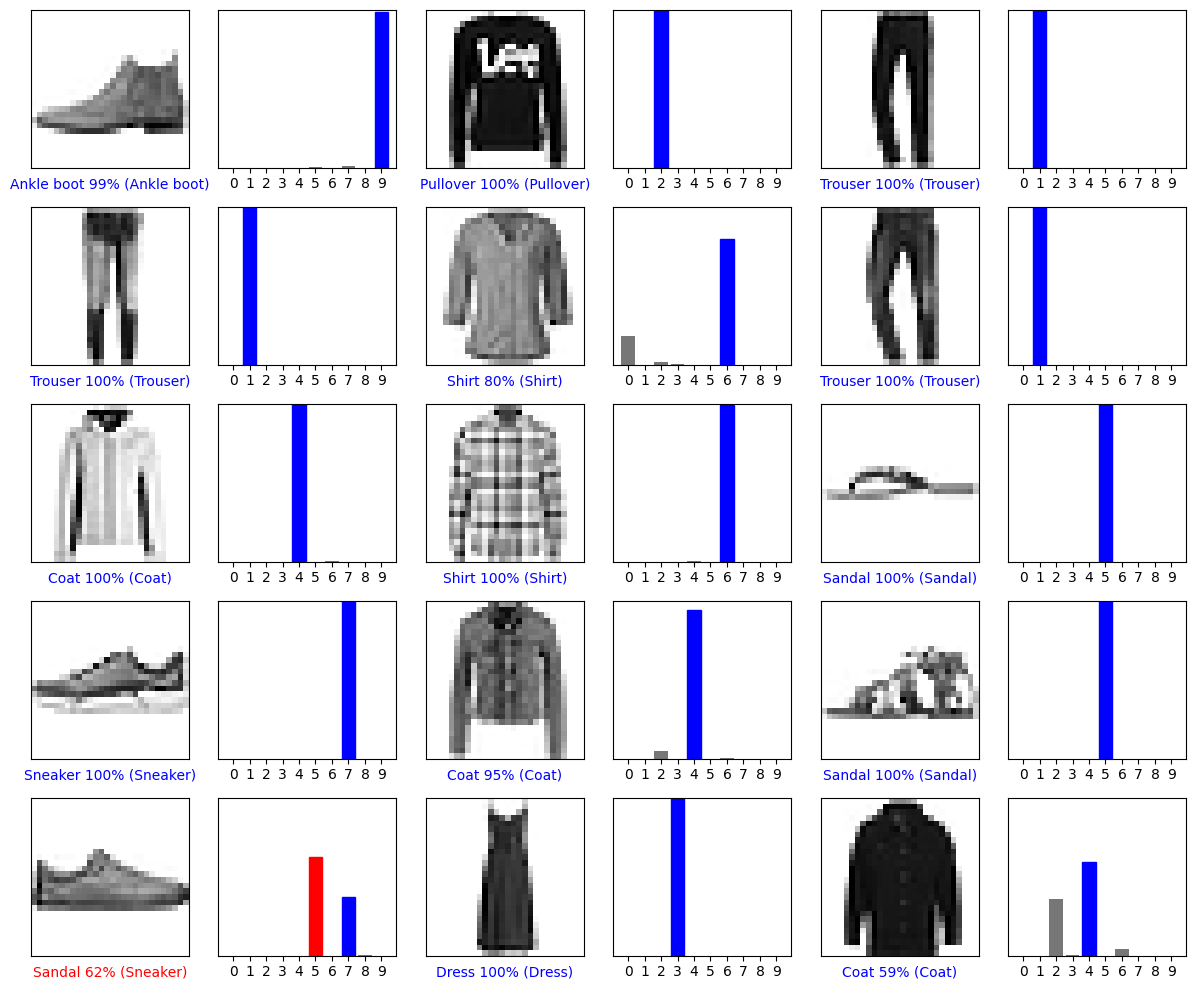

In [30]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

### Text classification

In [41]:
import matplotlib.pyplot as plt
import os
import re
import shutil
import string
import tensorflow as tf

from tensorflow.keras import layers
from tensorflow.keras import losses

#### load dataset

In [42]:
url = "https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz"

dataset = tf.keras.utils.get_file("aclImdb_v1", url,
                                    untar=True, cache_dir='.',
                                    cache_subdir='')

In [43]:
dataset_dir = os.path.join(os.path.dirname(dataset), 'aclImdb')

In [44]:
os.listdir(dataset_dir)

['imdb.vocab', 'imdbEr.txt', 'README', 'test', 'train']

In [45]:
train_dir = os.path.join(dataset_dir, 'train')
os.listdir(train_dir)

['labeledBow.feat',
 'neg',
 'pos',
 'unsup',
 'unsupBow.feat',
 'urls_neg.txt',
 'urls_pos.txt',
 'urls_unsup.txt']

In [46]:
sample_file = os.path.join(train_dir, 'pos/1181_9.txt')
with open(sample_file) as f:
  print(f.read())

Rachel Griffiths writes and directs this award winning short film. A heartwarming story about coping with grief and cherishing the memory of those we've loved and lost. Although, only 15 minutes long, Griffiths manages to capture so much emotion and truth onto film in the short space of time. Bud Tingwell gives a touching performance as Will, a widower struggling to cope with his wife's death. Will is confronted by the harsh reality of loneliness and helplessness as he proceeds to take care of Ruth's pet cow, Tulip. The film displays the grief and responsibility one feels for those they have loved and lost. Good cinematography, great direction, and superbly acted. It will bring tears to all those who have lost a loved one, and survived.


NOTE : TO CONTINUE THIS LATER

# Advanced

## Customization

### tensors and operations

In [47]:
import tensorflow as tf

In [49]:
tf.math.add(1,2)

<tf.Tensor: shape=(), dtype=int32, numpy=3>

In [50]:
tf.math.add([1, 2], [3, 4])

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([4, 6])>

In [51]:
tf.math.square(5)

<tf.Tensor: shape=(), dtype=int32, numpy=25>

In [52]:
tf.math.reduce_sum([1, 2, 3])

<tf.Tensor: shape=(), dtype=int32, numpy=6>

In [53]:
# Operator overloading is also supported
print(tf.math.square(2) + tf.math.square(3))

tf.Tensor(13, shape=(), dtype=int32)


In [54]:
x = tf.linalg.matmul([[1]], [[2, 3]])
print(x)
print(x.shape)
print(x.dtype)

tf.Tensor([[2 3]], shape=(1, 2), dtype=int32)
(1, 2)
<dtype: 'int32'>


tensor and numpy array compatibility

In [55]:
import numpy as np

ndarray = np.ones([3, 3])

print("TensorFlow operations convert numpy arrays to Tensors automatically")
tensor = tf.math.multiply(ndarray, 42)
print(tensor)

TensorFlow operations convert numpy arrays to Tensors automatically
tf.Tensor(
[[42. 42. 42.]
 [42. 42. 42.]
 [42. 42. 42.]], shape=(3, 3), dtype=float64)


In [56]:
print("And NumPy operations convert Tensors to NumPy arrays automatically")
print(np.add(tensor, 1))

And NumPy operations convert Tensors to NumPy arrays automatically
[[43. 43. 43.]
 [43. 43. 43.]
 [43. 43. 43.]]


In [57]:
print("The .numpy() method explicitly converts a Tensor to a numpy array")
print(tensor.numpy())

The .numpy() method explicitly converts a Tensor to a numpy array
[[42. 42. 42.]
 [42. 42. 42.]
 [42. 42. 42.]]


 TensorFlow automatically decides whether to use the GPU or CPU for an operation—copying the tensor between CPU and GPU memory, if necessary. 

In [58]:
x = tf.random.uniform([3, 3])

print("Is there a GPU available: "),
print(tf.config.list_physical_devices("GPU"))

print("Is the Tensor on GPU #0:  "),
print(x.device.endswith('GPU:0'))

Is there a GPU available: 
[]
Is the Tensor on GPU #0:  
False


In [59]:
import time

def time_matmul(x):
  start = time.time()
  for loop in range(10):
    tf.linalg.matmul(x, x)

  result = time.time()-start

  print("10 loops: {:0.2f}ms".format(1000*result))

# Force execution on CPU
print("On CPU:")
with tf.device("CPU:0"):
  x = tf.random.uniform([1000, 1000])
  assert x.device.endswith("CPU:0")
  time_matmul(x)

# Force execution on GPU #0 if available
if tf.config.list_physical_devices("GPU"):
  print("On GPU:")
  with tf.device("GPU:0"): # Or GPU:1 for the 2nd GPU, GPU:2 for the 3rd etc.
    x = tf.random.uniform([1000, 1000])
    assert x.device.endswith("GPU:0")
    time_matmul(x)

On CPU:
10 loops: 106.34ms


create dataset

In [60]:
ds_tensors = tf.data.Dataset.from_tensor_slices([1, 2, 3, 4, 5, 6])

# Create a CSV file
import tempfile
_, filename = tempfile.mkstemp()

with open(filename, 'w') as f:
  f.write("""Line 1
Line 2
Line 3
  """)

ds_file = tf.data.TextLineDataset(filename)

In [61]:
ds_tensors = ds_tensors.map(tf.math.square).shuffle(2).batch(2)

ds_file = ds_file.batch(2)

In [62]:
print('Elements of ds_tensors:')
for x in ds_tensors:
  print(x)

print('\nElements in ds_file:')
for x in ds_file:
  print(x)

Elements of ds_tensors:
tf.Tensor([4 1], shape=(2,), dtype=int32)
tf.Tensor([ 9 25], shape=(2,), dtype=int32)
tf.Tensor([16 36], shape=(2,), dtype=int32)

Elements in ds_file:
tf.Tensor([b'Line 1' b'Line 2'], shape=(2,), dtype=string)
tf.Tensor([b'Line 3' b'  '], shape=(2,), dtype=string)


### Custom layers

In [66]:
print(tf.config.list_physical_devices('GPU'))


[]


layer in keras

In [67]:
# In the tf.keras.layers package, layers are objects. To construct a layer,
# simply construct the object. Most layers take as a first argument the number
# of output dimensions / channels.
layer = tf.keras.layers.Dense(100)
# The number of input dimensions is often unnecessary, as it can be inferred
# the first time the layer is used, but it can be provided if you want to
# specify it manually, which is useful in some complex models.
layer = tf.keras.layers.Dense(10, input_shape=(None, 5))

In [68]:
# To use a layer, simply call it.
layer(tf.zeros([10, 5]))

<tf.Tensor: shape=(10, 10), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)>

In [69]:
# Layers have many useful methods. For example, you can inspect all variables
# in a layer using `layer.variables` and trainable variables using
# `layer.trainable_variables`. In this case a fully-connected layer
# will have variables for weights and biases.
layer.variables

[<tf.Variable 'dense_3/kernel:0' shape=(5, 10) dtype=float32, numpy=
 array([[ 0.35946476, -0.19149512,  0.32989562, -0.47832125,  0.09854144,
         -0.26317832,  0.5152927 ,  0.55798954,  0.4366644 , -0.21833906],
        [-0.35650492,  0.37826794,  0.14346653,  0.5667345 , -0.58322334,
         -0.21874756, -0.42022312,  0.19866186,  0.560484  , -0.5062738 ],
        [-0.526007  , -0.36418414,  0.216214  , -0.5587692 , -0.07959676,
         -0.3643461 ,  0.21633053,  0.1004194 ,  0.16439724, -0.09256601],
        [-0.17083898, -0.5181887 ,  0.15890914,  0.6288014 , -0.07860214,
          0.40426582,  0.49846834, -0.5286111 ,  0.14161122,  0.3474034 ],
        [-0.4078824 ,  0.09981048,  0.05286622,  0.23884052, -0.15184513,
          0.32777065, -0.42092925, -0.06436056,  0.3589139 ,  0.48456806]],
       dtype=float32)>,
 <tf.Variable 'dense_3/bias:0' shape=(10,) dtype=float32, numpy=array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)>]

In [70]:
# The variables are also accessible through nice accessors
layer.kernel, layer.bias

(<tf.Variable 'dense_3/kernel:0' shape=(5, 10) dtype=float32, numpy=
 array([[ 0.35946476, -0.19149512,  0.32989562, -0.47832125,  0.09854144,
         -0.26317832,  0.5152927 ,  0.55798954,  0.4366644 , -0.21833906],
        [-0.35650492,  0.37826794,  0.14346653,  0.5667345 , -0.58322334,
         -0.21874756, -0.42022312,  0.19866186,  0.560484  , -0.5062738 ],
        [-0.526007  , -0.36418414,  0.216214  , -0.5587692 , -0.07959676,
         -0.3643461 ,  0.21633053,  0.1004194 ,  0.16439724, -0.09256601],
        [-0.17083898, -0.5181887 ,  0.15890914,  0.6288014 , -0.07860214,
          0.40426582,  0.49846834, -0.5286111 ,  0.14161122,  0.3474034 ],
        [-0.4078824 ,  0.09981048,  0.05286622,  0.23884052, -0.15184513,
          0.32777065, -0.42092925, -0.06436056,  0.3589139 ,  0.48456806]],
       dtype=float32)>,
 <tf.Variable 'dense_3/bias:0' shape=(10,) dtype=float32, numpy=array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)>)

Implementing custom layers

In [73]:
class MyDenseLayer(tf.keras.layers.Layer):

  def __init__(self, num_outputs):
    """__init__ , where you can do all input-independent initialization
    """
    super(MyDenseLayer, self).__init__()
    self.num_outputs = num_outputs

  def build(self, input_shape):
    """
    build, where you know the shapes of the input tensors and can do the rest of the initialization
    """
    self.kernel = self.add_weight("kernel",
                                  shape=[int(input_shape[-1]),
                                         self.num_outputs])

  def call(self, inputs):
    """call, where you do the forward computation"""
    return tf.matmul(inputs, self.kernel)

layer = MyDenseLayer(10)

In [74]:
_ = layer(tf.zeros([10, 5])) # Calling the layer `.builds` it.


In [75]:
_

<tf.Tensor: shape=(10, 10), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)>

In [76]:
print([var.name for var in layer.trainable_variables])

['my_dense_layer_1/kernel:0']


In [77]:
class ResnetIdentityBlock(tf.keras.Model):
  def __init__(self, kernel_size, filters):
    super(ResnetIdentityBlock, self).__init__(name='')
    filters1, filters2, filters3 = filters

    self.conv2a = tf.keras.layers.Conv2D(filters1, (1, 1))
    self.bn2a = tf.keras.layers.BatchNormalization()

    self.conv2b = tf.keras.layers.Conv2D(filters2, kernel_size, padding='same')
    self.bn2b = tf.keras.layers.BatchNormalization()

    self.conv2c = tf.keras.layers.Conv2D(filters3, (1, 1))
    self.bn2c = tf.keras.layers.BatchNormalization()

  def call(self, input_tensor, training=False):
    x = self.conv2a(input_tensor)
    x = self.bn2a(x, training=training)
    x = tf.nn.relu(x)

    x = self.conv2b(x)
    x = self.bn2b(x, training=training)
    x = tf.nn.relu(x)

    x = self.conv2c(x)
    x = self.bn2c(x, training=training)

    x += input_tensor
    return tf.nn.relu(x)


block = ResnetIdentityBlock(1, [1, 2, 3])

In [78]:
_ = block(tf.zeros([1, 2, 3, 3]))


In [79]:
block.layers


In [80]:
len(block.variables)


18

In [81]:
my_seq = tf.keras.Sequential([tf.keras.layers.Conv2D(1, (1, 1),
                                                    input_shape=(
                                                        None, None, 3)),
                             tf.keras.layers.BatchNormalization(),
                             tf.keras.layers.Conv2D(2, 1,
                                                    padding='same'),
                             tf.keras.layers.BatchNormalization(),
                             tf.keras.layers.Conv2D(3, (1, 1)),
                             tf.keras.layers.BatchNormalization()])
my_seq(tf.zeros([1, 2, 3, 3]))

<tf.Tensor: shape=(1, 2, 3, 3), dtype=float32, numpy=
array([[[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]]], dtype=float32)>

In [82]:
my_seq.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, None, None, 1)     4         
                                                                 
 batch_normalization_3 (Batc  (None, None, None, 1)    4         
 hNormalization)                                                 
                                                                 
 conv2d_4 (Conv2D)           (None, None, None, 2)     4         
                                                                 
 batch_normalization_4 (Batc  (None, None, None, 2)    8         
 hNormalization)                                                 
                                                                 
 conv2d_5 (Conv2D)           (None, None, None, 3)     9         
                                                                 
 batch_normalization_5 (Batc  (None, None, None, 3)   

### custom models

In [84]:
pip install -q tfds-nightly

Note: you may need to restart the kernel to use updated packages.


  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
rasa 3.6.16 requires prompt-toolkit<3.0.29,>=3.0, but you have prompt-toolkit 3.0.43 which is incompatible.
rasa 3.6.16 requires protobuf<4.23.4,>=4.23.3, but you have protobuf 3.20.3 which is incompatible.

[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [85]:
import os
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

print("TensorFlow version: {}".format(tf.__version__))
print("TensorFlow Datasets version: ",tfds.__version__)

C:\self\gists\common_env\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


TensorFlow version: 2.12.0
TensorFlow Datasets version:  4.9.4+nightly


In [86]:
ds_preview, info = tfds.load('penguins/simple', split='train', with_info=True)
df = tfds.as_dataframe(ds_preview.take(5), info)
print(df)
print(info.features)

Dl Completed...: 0 url [00:00, ? url/s]
Dl Completed...: 100%|█████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.73 url/s]
Dl Size...: 0 MiB [00:00, ? MiB/s]
Generating splits...:   0%|                                                                 | 0/1 [00:00<?, ? splits/s]
Generating train examples...: 0 examples [00:00, ? examples/s]
                                                              
Shuffling C:\Users\senthil.marimuthu\tensorflow_datasets\penguins\simple\incomplete.1PS4Q0_1.0.0\penguins-train.tfrecor


Dataset penguins downloaded and prepared to C:\Users\senthil.marimuthu\tensorflow_datasets\penguins\simple\1.0.0. Subsequent calls will reuse this data.
   body_mass_g  culmen_depth_mm  culmen_length_mm  flipper_length_mm  island   
0       4200.0             13.9         45.500000              210.0       0  \
1       4650.0             13.7         40.900002              214.0       0   
2       5300.0             14.2         51.299999              218.0       0   
3       5650.0             15.0         47.799999              215.0       0   
4       5050.0             15.8         46.299999              215.0       0   

   sex  species  
0    0        2  
1    0        2  
2    1        2  
3    1        2  
4    1        2  
FeaturesDict({
    'body_mass_g': float32,
    'culmen_depth_mm': float32,
    'culmen_length_mm': float32,
    'flipper_length_mm': float32,
    'island': ClassLabel(shape=(), dtype=int64, num_classes=3),
    'sex': ClassLabel(shape=(), dtype=int64, num_cla

Dl Completed...: 100%|█████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.50 url/s]
Dl Size...: 0 MiB [00:00, ? MiB/s]

In [87]:
ds_split, info = tfds.load("penguins/processed", split=['train[:20%]', 'train[20%:]'], as_supervised=True, with_info=True)

ds_test = ds_split[0]
ds_train = ds_split[1]
assert isinstance(ds_test, tf.data.Dataset)

print(info.features)
df_test = tfds.as_dataframe(ds_test.take(5), info)
print("Test dataset sample: ")
print(df_test)

df_train = tfds.as_dataframe(ds_train.take(5), info)
print("Train dataset sample: ")
print(df_train)

ds_train_batch = ds_train.batch(32)

Dl Completed...: 0 url [00:00, ? url/s]
Dl Completed...:   0%|                                                                         | 0/1 [00:00<?, ? url/s]
Dl Size...: 0 MiB [00:00, ? MiB/s]
Generating splits...:   0%|                                                                 | 0/1 [00:00<?, ? splits/s]
Generating train examples...: 0 examples [00:00, ? examples/s]
                                                              
Shuffling C:\Users\senthil.marimuthu\tensorflow_datasets\penguins\processed\incomplete.79D3FU_1.0.0\penguins-train.tfre


Dataset penguins downloaded and prepared to C:\Users\senthil.marimuthu\tensorflow_datasets\penguins\processed\1.0.0. Subsequent calls will reuse this data.
FeaturesDict({
    'features': Tensor(shape=(4,), dtype=float32),
    'species': ClassLabel(shape=(), dtype=int64, num_classes=3),
})
Test dataset sample: 
                                         features  species
0  [0.6545454, 0.22619048, 0.89830506, 0.6388889]        2
1        [0.36, 0.04761905, 0.6440678, 0.4027778]        2
2       [0.68, 0.30952382, 0.91525424, 0.6944444]        2
3   [0.6181818, 0.20238096, 0.8135593, 0.6805556]        2
4  [0.5527273, 0.26190478, 0.84745765, 0.7083333]        2
Train dataset sample: 
                                         features  species
0  [0.49818182, 0.6904762, 0.42372882, 0.4027778]        0
1      [0.48, 0.071428575, 0.6440678, 0.44444445]        2
2    [0.7236364, 0.9047619, 0.6440678, 0.5833333]        1
3  [0.34545454, 0.5833333, 0.33898306, 0.3472222]        0
4       [0.10909

In [88]:
features, labels = next(iter(ds_train_batch))

print(features)
print(labels)

tf.Tensor(
[[0.49818182 0.6904762  0.42372882 0.4027778 ]
 [0.48       0.07142857 0.6440678  0.44444445]
 [0.7236364  0.9047619  0.6440678  0.5833333 ]
 [0.34545454 0.5833333  0.33898306 0.3472222 ]
 [0.10909091 0.75       0.3559322  0.41666666]
 [0.6690909  0.63095236 0.47457626 0.19444445]
 [0.8036364  0.9166667  0.4915254  0.44444445]
 [0.4909091  0.75       0.37288135 0.22916667]
 [0.33454546 0.85714287 0.37288135 0.2361111 ]
 [0.32       0.41666666 0.2542373  0.1388889 ]
 [0.41454545 0.5952381  0.5084746  0.19444445]
 [0.14909092 0.48809522 0.2542373  0.125     ]
 [0.23636363 0.4642857  0.27118644 0.05555556]
 [0.22181818 0.5952381  0.22033899 0.3472222 ]
 [0.24727273 0.5595238  0.15254237 0.25694445]
 [0.63272727 0.35714287 0.88135594 0.8194444 ]
 [0.47272727 0.15476191 0.6440678  0.4722222 ]
 [0.6036364  0.23809524 0.84745765 0.7361111 ]
 [0.26909092 0.5595238  0.27118644 0.16666667]
 [0.28       0.71428573 0.20338982 0.5416667 ]
 [0.10545454 0.5714286  0.33898306 0.2847222 ]
 [

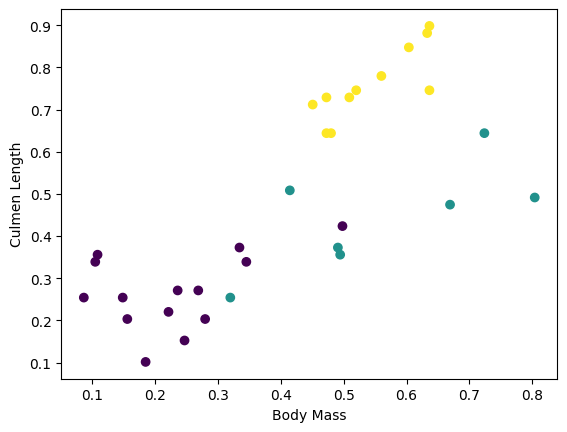

In [89]:
plt.scatter(features[:,0],
            features[:,2],
            c=labels,
            cmap='viridis')

plt.xlabel("Body Mass")
plt.ylabel("Culmen Length")
plt.show()

In [90]:
model = tf.keras.Sequential([
  tf.keras.layers.Dense(10, activation=tf.nn.relu, input_shape=(4,)),  # input shape required
  tf.keras.layers.Dense(10, activation=tf.nn.relu),
  tf.keras.layers.Dense(3)
])

In [91]:
predictions = model(features)
predictions[:5]

<tf.Tensor: shape=(5, 3), dtype=float32, numpy=
array([[-0.2385765 , -0.30241966,  0.3204851 ],
       [-0.11800919, -0.03621702,  0.3192709 ],
       [-0.32781094, -0.40751776,  0.4431124 ],
       [-0.18889362, -0.23433745,  0.24381582],
       [-0.19638991, -0.23184654,  0.20416777]], dtype=float32)>

In [92]:
tf.nn.softmax(predictions[:5])

<tf.Tensor: shape=(5, 3), dtype=float32, numpy=
array([[0.2712098 , 0.25443602, 0.47435415],
       [0.27520007, 0.29865545, 0.42614448],
       [0.24478915, 0.22603515, 0.52917576],
       [0.28595924, 0.27325502, 0.4407857 ],
       [0.2891994 , 0.27912506, 0.43167552]], dtype=float32)>

In [93]:
print("Prediction: {}".format(tf.math.argmax(predictions, axis=1)))
print("    Labels: {}".format(labels))

Prediction: [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
    Labels: [0 2 1 0 0 1 1 1 0 1 1 0 0 0 0 2 2 2 0 0 0 0 2 2 1 2 0 2 2 2 2 0]


In [94]:
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [95]:
def loss(model, x, y, training):
  # training=training is needed only if there are layers with different
  # behavior during training versus inference (e.g. Dropout).
  y_ = model(x, training=training)

  return loss_object(y_true=y, y_pred=y_)

l = loss(model, features, labels, training=False)
print("Loss test: {}".format(l))

Loss test: 1.1346958875656128


In [96]:
def grad(model, inputs, targets):
  with tf.GradientTape() as tape:
    loss_value = loss(model, inputs, targets, training=True)
  return loss_value, tape.gradient(loss_value, model.trainable_variables)

In [97]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)

In [98]:
loss_value, grads = grad(model, features, labels)

print("Step: {}, Initial Loss: {}".format(optimizer.iterations.numpy(),
                                          loss_value.numpy()))

optimizer.apply_gradients(zip(grads, model.trainable_variables))

print("Step: {},         Loss: {}".format(optimizer.iterations.numpy(),
                                          loss(model, features, labels, training=True).numpy()))

Step: 0, Initial Loss: 1.1346958875656128
Step: 1,         Loss: 1.1326282024383545


In [99]:
## Note: Rerunning this cell uses the same model parameters

# Keep results for plotting
train_loss_results = []
train_accuracy_results = []

num_epochs = 201

for epoch in range(num_epochs):
  epoch_loss_avg = tf.keras.metrics.Mean()
  epoch_accuracy = tf.keras.metrics.SparseCategoricalAccuracy()

  # Training loop - using batches of 32
  for x, y in ds_train_batch:
    # Optimize the model
    loss_value, grads = grad(model, x, y)
    optimizer.apply_gradients(zip(grads, model.trainable_variables))

    # Track progress
    epoch_loss_avg.update_state(loss_value)  # Add current batch loss
    # Compare predicted label to actual label
    # training=True is needed only if there are layers with different
    # behavior during training versus inference (e.g. Dropout).
    epoch_accuracy.update_state(y, model(x, training=True))

  # End epoch
  train_loss_results.append(epoch_loss_avg.result())
  train_accuracy_results.append(epoch_accuracy.result())

  if epoch % 50 == 0:
    print("Epoch {:03d}: Loss: {:.3f}, Accuracy: {:.3%}".format(epoch,
                                                                epoch_loss_avg.result(),
                                                                epoch_accuracy.result()))

Epoch 000: Loss: 1.116, Accuracy: 35.581%
Epoch 050: Loss: 0.592, Accuracy: 80.524%
Epoch 100: Loss: 0.403, Accuracy: 81.648%
Epoch 150: Loss: 0.304, Accuracy: 89.513%
Epoch 200: Loss: 0.226, Accuracy: 94.757%


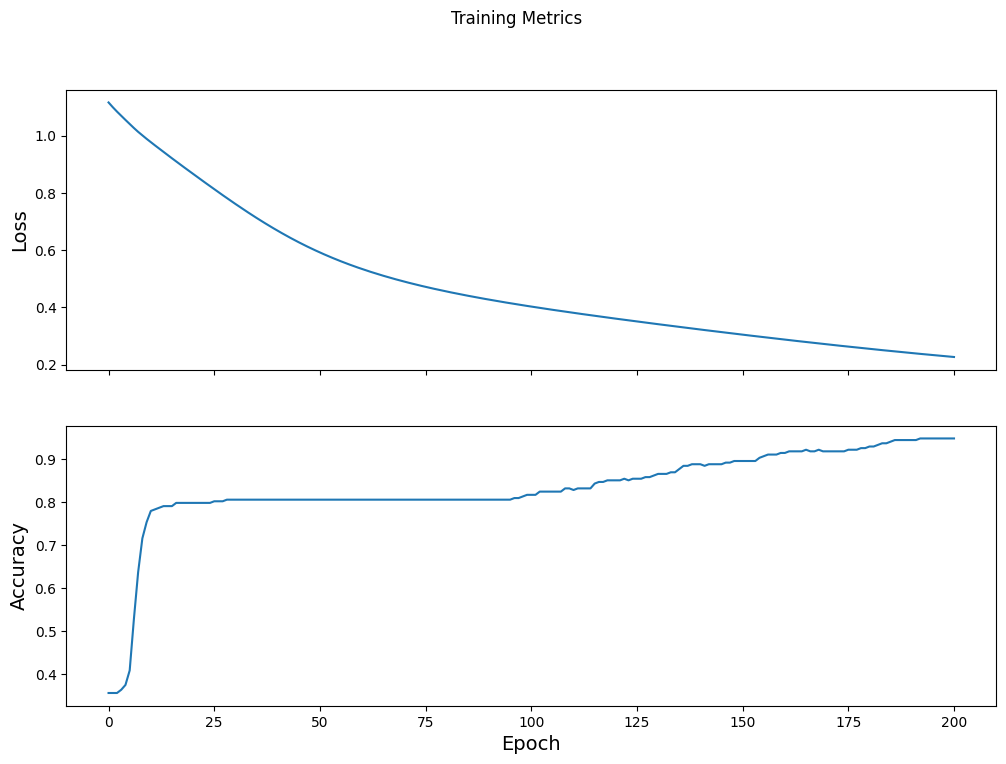

In [100]:
fig, axes = plt.subplots(2, sharex=True, figsize=(12, 8))
fig.suptitle('Training Metrics')

axes[0].set_ylabel("Loss", fontsize=14)
axes[0].plot(train_loss_results)

axes[1].set_ylabel("Accuracy", fontsize=14)
axes[1].set_xlabel("Epoch", fontsize=14)
axes[1].plot(train_accuracy_results)
plt.show()

In [101]:
test_accuracy = tf.keras.metrics.Accuracy()
ds_test_batch = ds_test.batch(10)

for (x, y) in ds_test_batch:
  # training=False is needed only if there are layers with different
  # behavior during training versus inference (e.g. Dropout).
  logits = model(x, training=False)
  prediction = tf.math.argmax(logits, axis=1, output_type=tf.int64)
  test_accuracy(prediction, y)

print("Test set accuracy: {:.3%}".format(test_accuracy.result()))

Test set accuracy: 95.522%


In [102]:
tf.stack([y,prediction],axis=1)

<tf.Tensor: shape=(7, 2), dtype=int64, numpy=
array([[1, 1],
       [0, 0],
       [2, 2],
       [0, 0],
       [1, 0],
       [2, 2],
       [0, 0]], dtype=int64)>

In [103]:
predict_dataset = tf.convert_to_tensor([
    [0.3, 0.8, 0.4, 0.5,],
    [0.4, 0.1, 0.8, 0.5,],
    [0.7, 0.9, 0.8, 0.4]
])

# training=False is needed only if there are layers with different
# behavior during training versus inference (e.g. Dropout).
predictions = model(predict_dataset, training=False)

for i, logits in enumerate(predictions):
  class_idx = tf.math.argmax(logits).numpy()
  p = tf.nn.softmax(logits)[class_idx]
  name = class_names[class_idx]
  print("Example {} prediction: {} ({:4.1f}%)".format(i, name, 100*p))

Example 0 prediction: T-shirt/top (77.5%)
Example 1 prediction: Pullover (97.9%)
Example 2 prediction: Trouser (78.4%)
